In [ ]:
# Required to run if you are on Google Colab. If not, run pip install -r requirements.txt
%%capture
%pip install -r requirements.txt

In [ ]:
from llama_index import SimpleDirectoryReader, GPTListIndex, GPTVectorStoreIndex, LLMPredictor, PromptHelper, StorageContext, load_index_from_storage
from langchain.chat_models import ChatOpenAI
import openai
import dotenv

config = dotenv.dotenv_values(".env")
openai.api_key = config['OPENAI_API_KEY']

In [ ]:
def construct_index(directory_path):
    max_input_size = 4096
    num_outputs = 512
    max_chunk_overlap = 20
    # chunk_overlap_ratio
    chunk_size_limit = 600

    prompt_helper = PromptHelper(context_window=max_input_size, num_output=num_outputs, chunk_size_limit=chunk_size_limit)

    llm_predictor = LLMPredictor(llm=ChatOpenAI(temperature=0.7, model="gpt-3.5-turbo", max_tokens=num_outputs))

    documents = SimpleDirectoryReader(directory_path).load_data()

    index = GPTVectorStoreIndex.from_documents(documents, llm_predictor=llm_predictor, prompt_helper=prompt_helper)
    index.storage_context.persist()

    return index

# **Config Data Path Below**

In [ ]:
DATA_PATH="data"

In [ ]:
index = construct_index(DATA_PATH)

# **To run this index, retrive from saved file first.**

In [ ]:
storage_context = StorageContext.from_defaults(persist_dir="storage")
index = load_index_from_storage(storage_context)

# **For CLI query, run below**

In [ ]:
chat_engine = index.as_chat_engine()
chat_engine.chat_repl()

===== Entering Chat REPL =====
Type "exit" to exit.

Human: exit


# **For UI query, run below**

In [ ]:
import gradio as gr
from gradio import Interface, Textbox

def chatbot(input_text):
    q_engine = index.as_query_engine(response_mode="compact")
    response = q_engine.query(input_text)
    return response.response

iface = Interface(fn=chatbot,
                     inputs=Textbox(lines=7, label="Enter your text"),
                     outputs="text",
                     title="LS Demo Chatbot")
iface.launch(share=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://abd5d162509b9c8974.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7863 <> https://abd5d162509b9c8974.gradio.live


# **Model Types**
https://platform.openai.com/docs/models

# **Pricing**
https://openai.com/pricing

# **Usage Log**
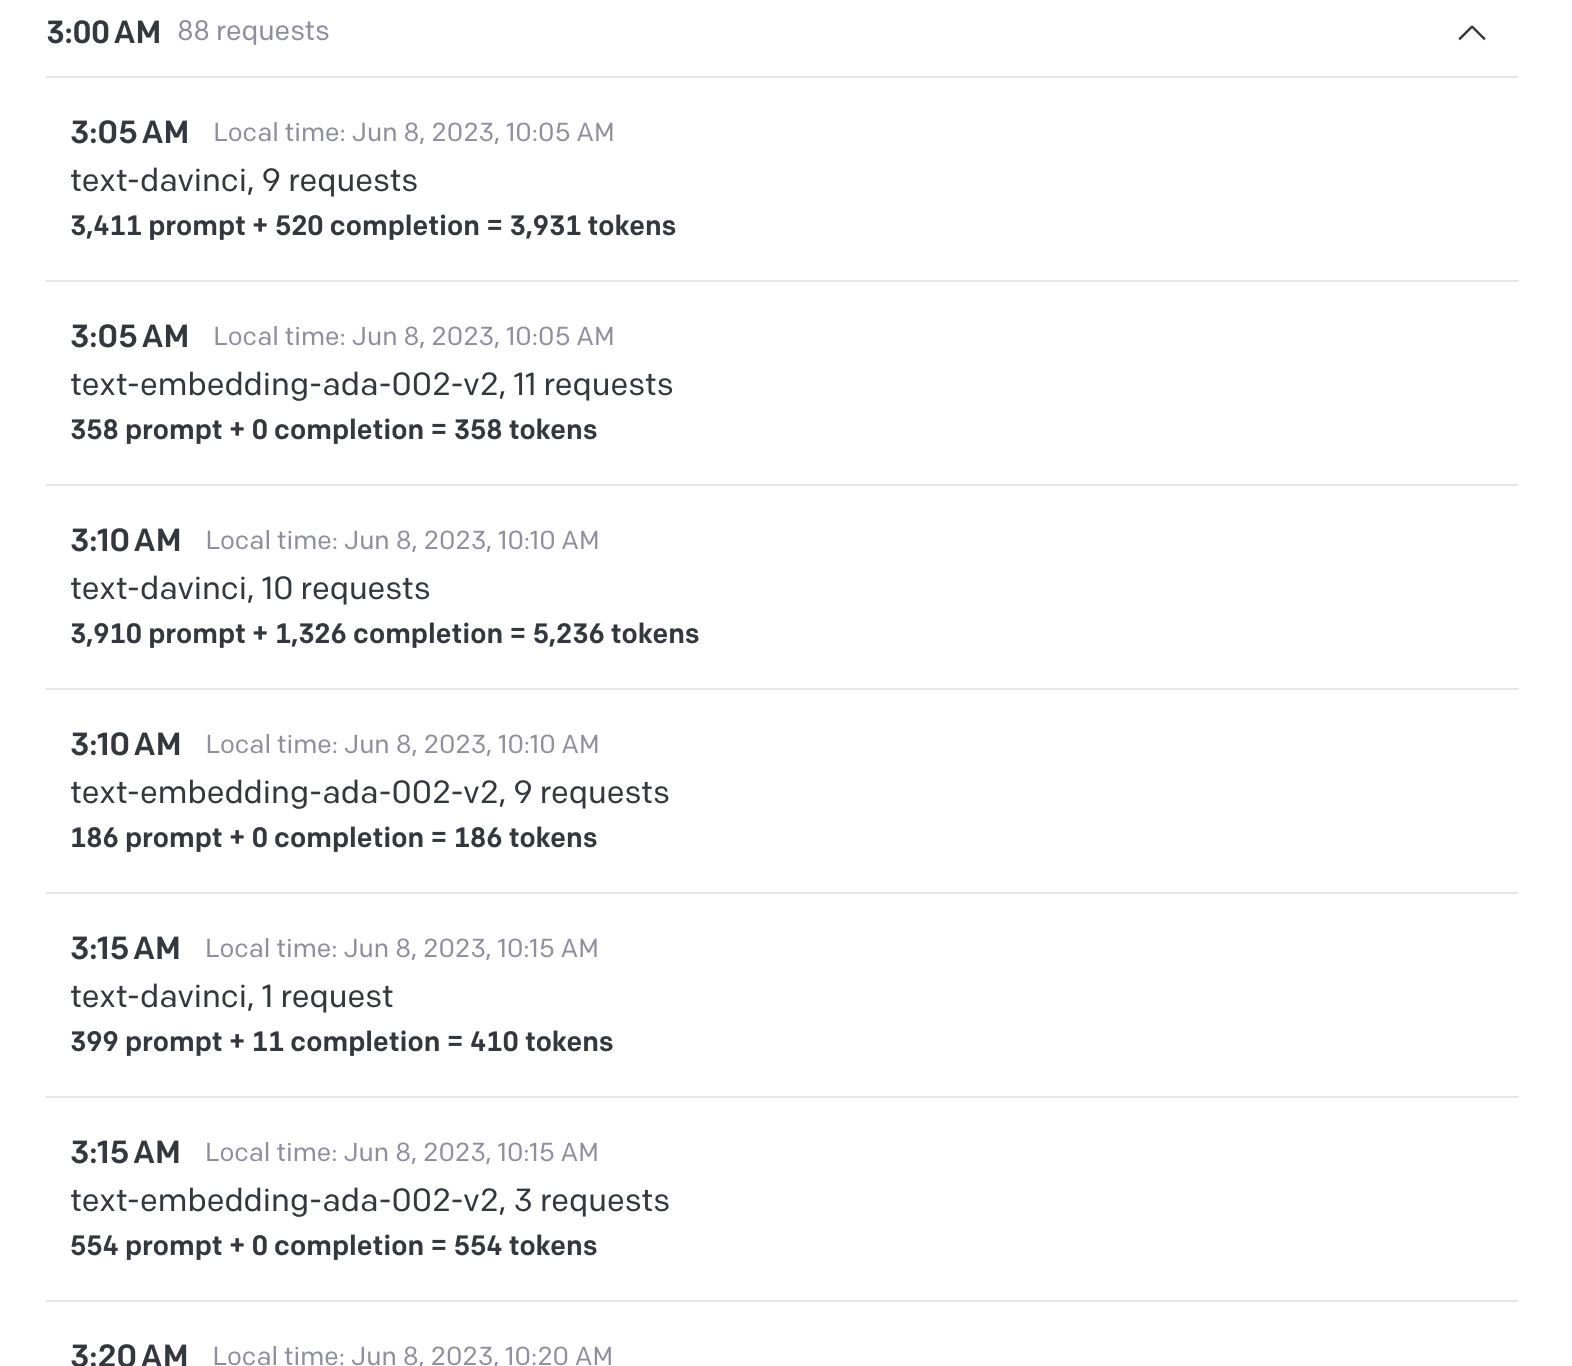

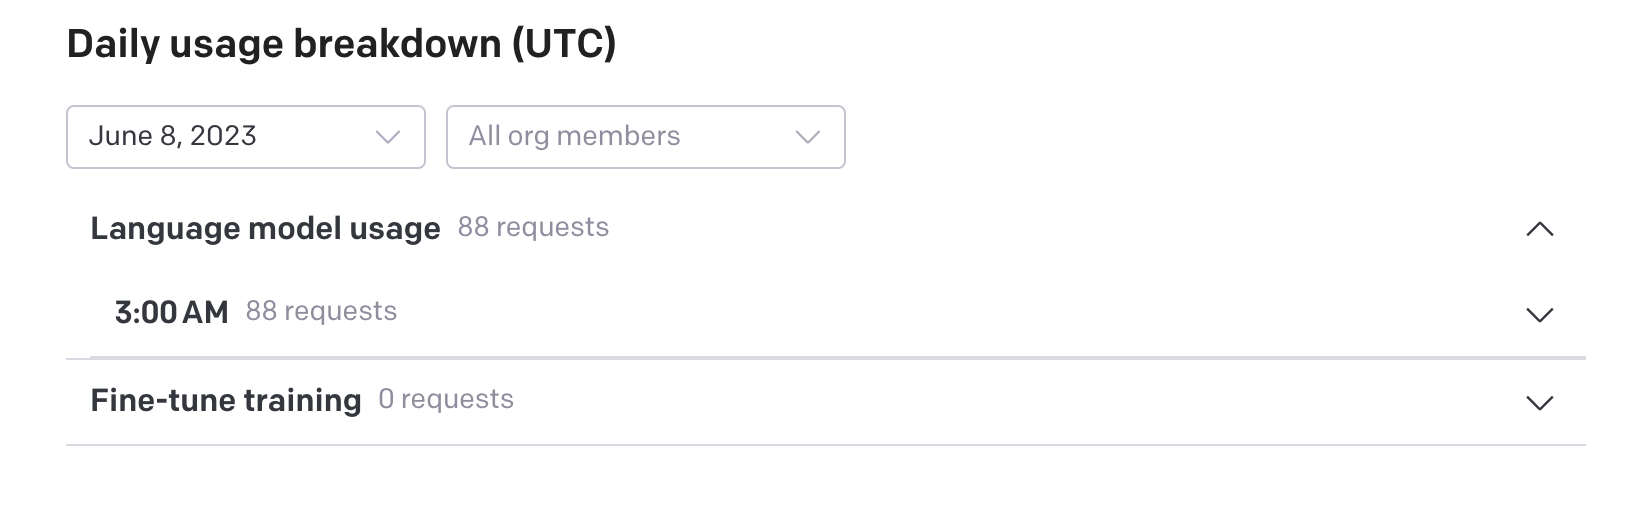

# **Per 1 message**
cost around 0.01$
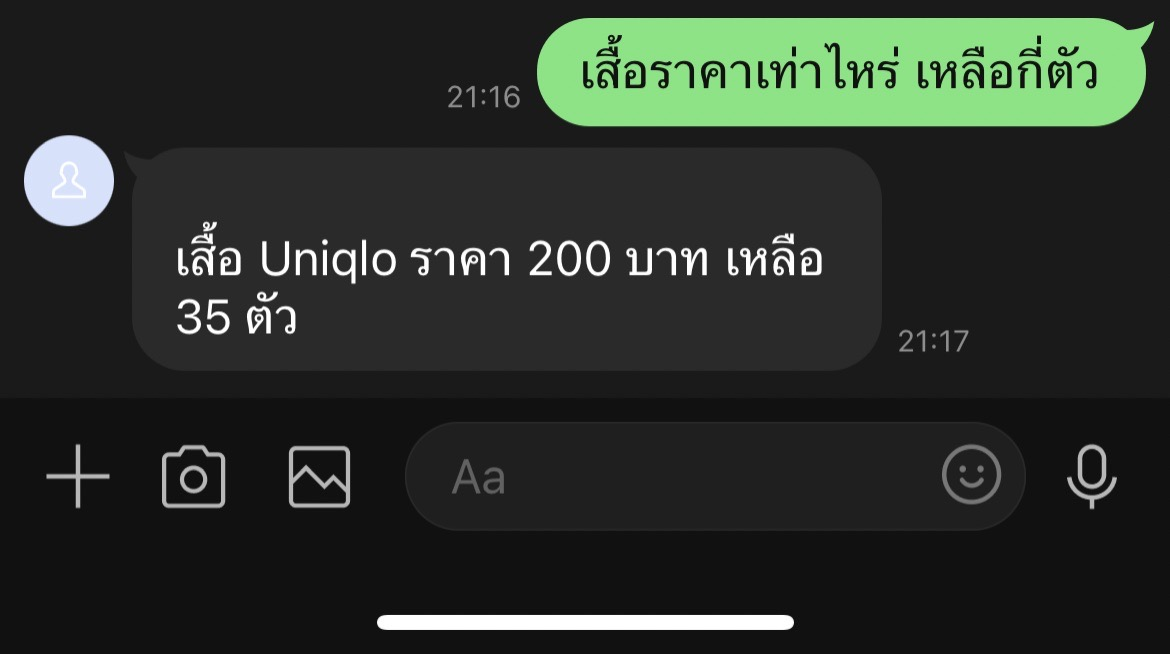

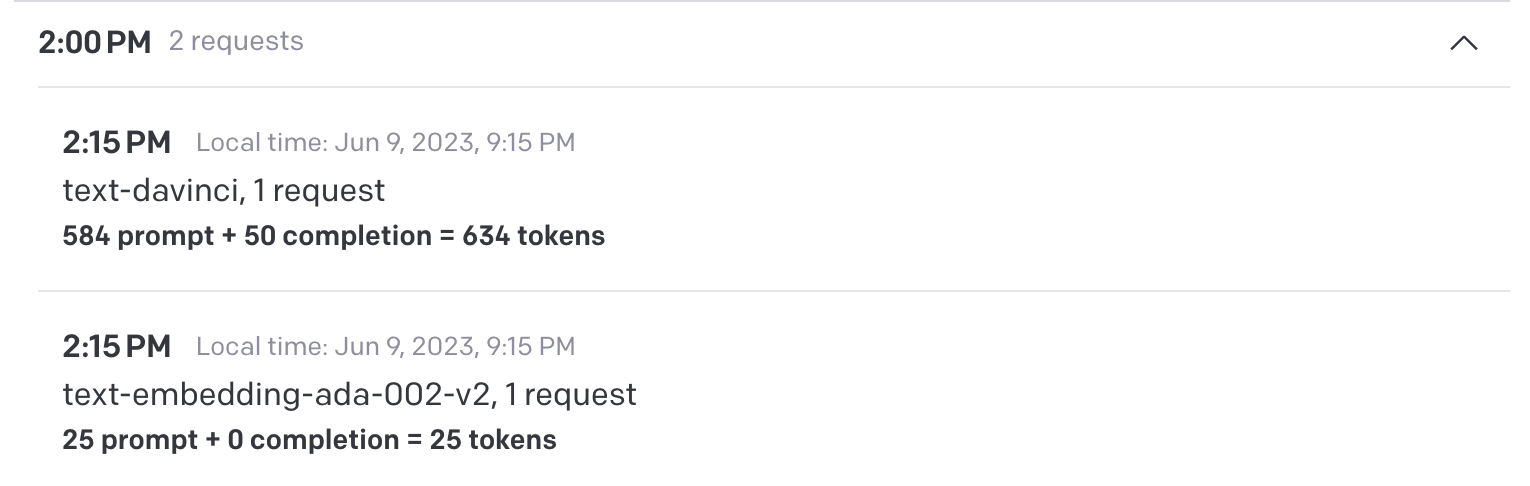